In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
import os
from sys import stdout, stderr
from IPython.display import display, clear_output

<h1>Setting initial parameters, choosing teh subjects</h1>

In [78]:
# Set the initial parameters
signame = "breathing_rate"
pm = "pm2_5"
high_pct, low_pct = 70, 30 #percentiles

res_data_path = r".\Speckled students\Data\Daphne\Daphne raw data\\"
combined_data_path = r".\Speckled students\Data\Daphne\2019-05-31 Daphne subject data\\"

subs = os.listdir(res_data_path)

# Selecting only those subjects which have recordings for both summer and winter seasons
subject_ids = []
for sub in subs:
    if sub[6:9] == "(1)" and sub[:6] + "(2)" + sub[9:] in subs:
        subject_ids += [sub[:6]]
        

# Overwriting the text display
last_stderr_length = 0
def stderr_overwrite(string):
    global last_stderr_length
    stderr.write("\r" +" "*last_stderr_length+"\r")
    stderr.write(string)

<h1>Analysis on the seasons based on the breathing rate, activity level, pm values</h1>

<IPython.core.display.Javascript object>


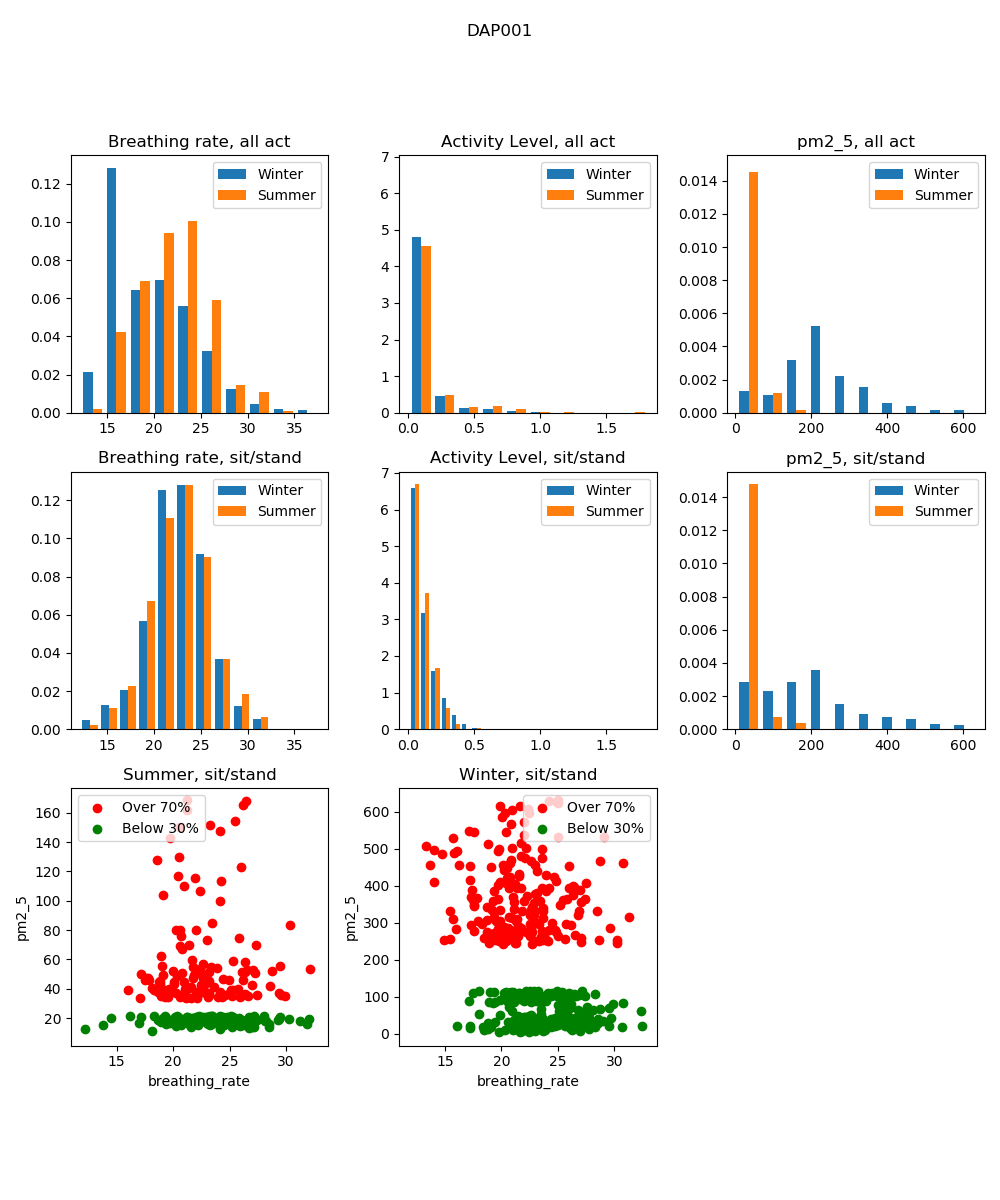

<IPython.core.display.Javascript object>


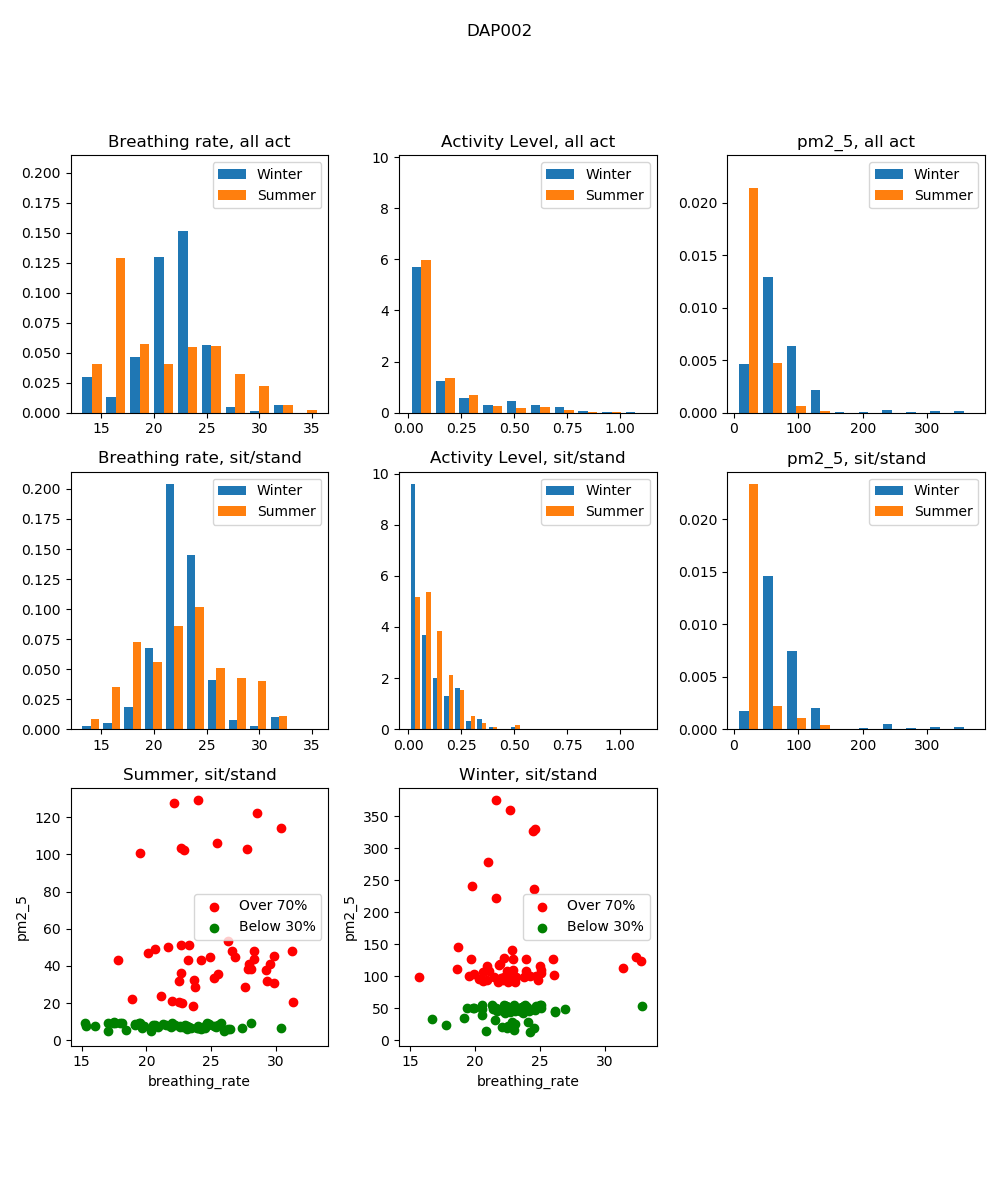

<IPython.core.display.Javascript object>


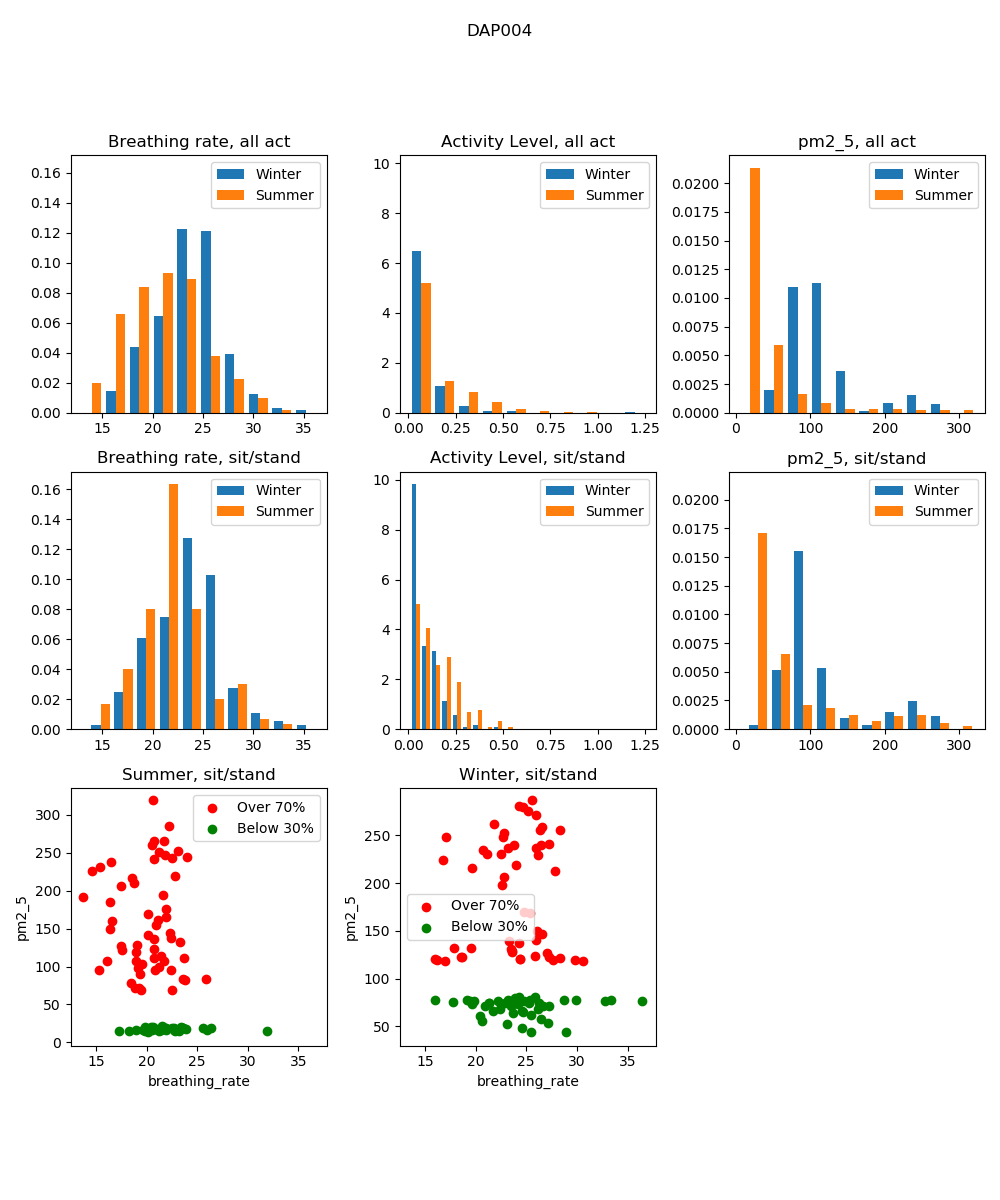

<IPython.core.display.Javascript object>


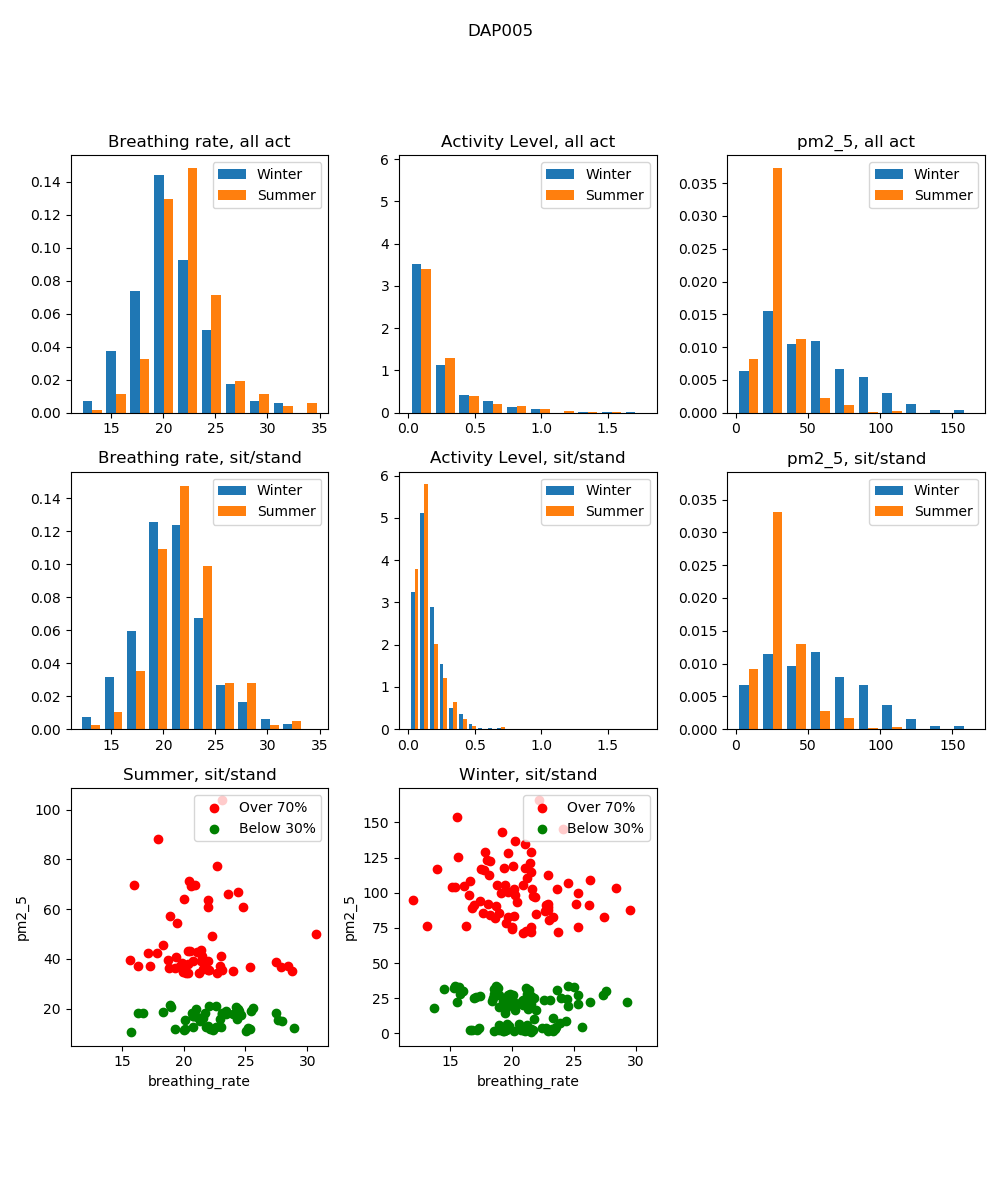

<IPython.core.display.Javascript object>


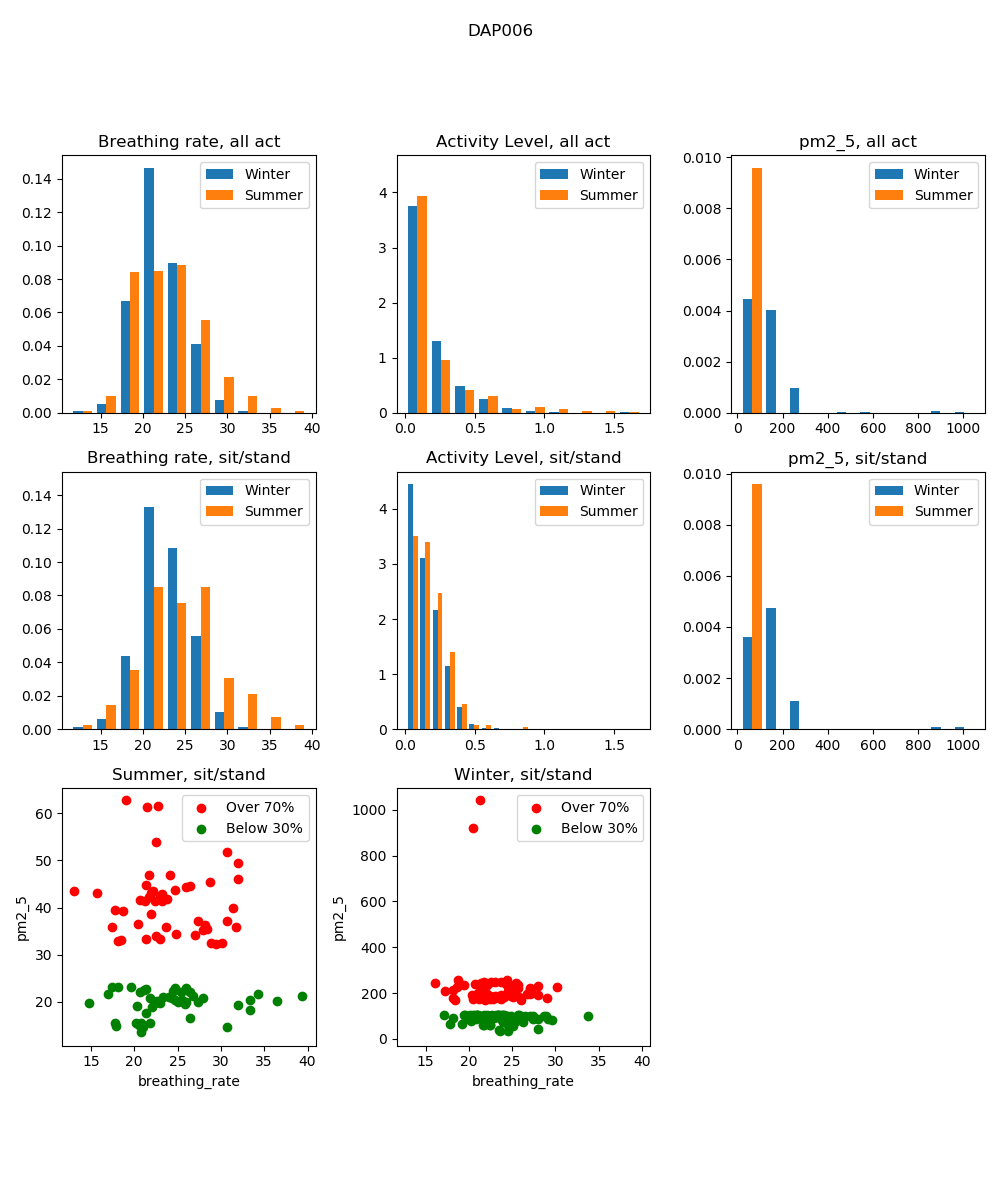

<IPython.core.display.Javascript object>


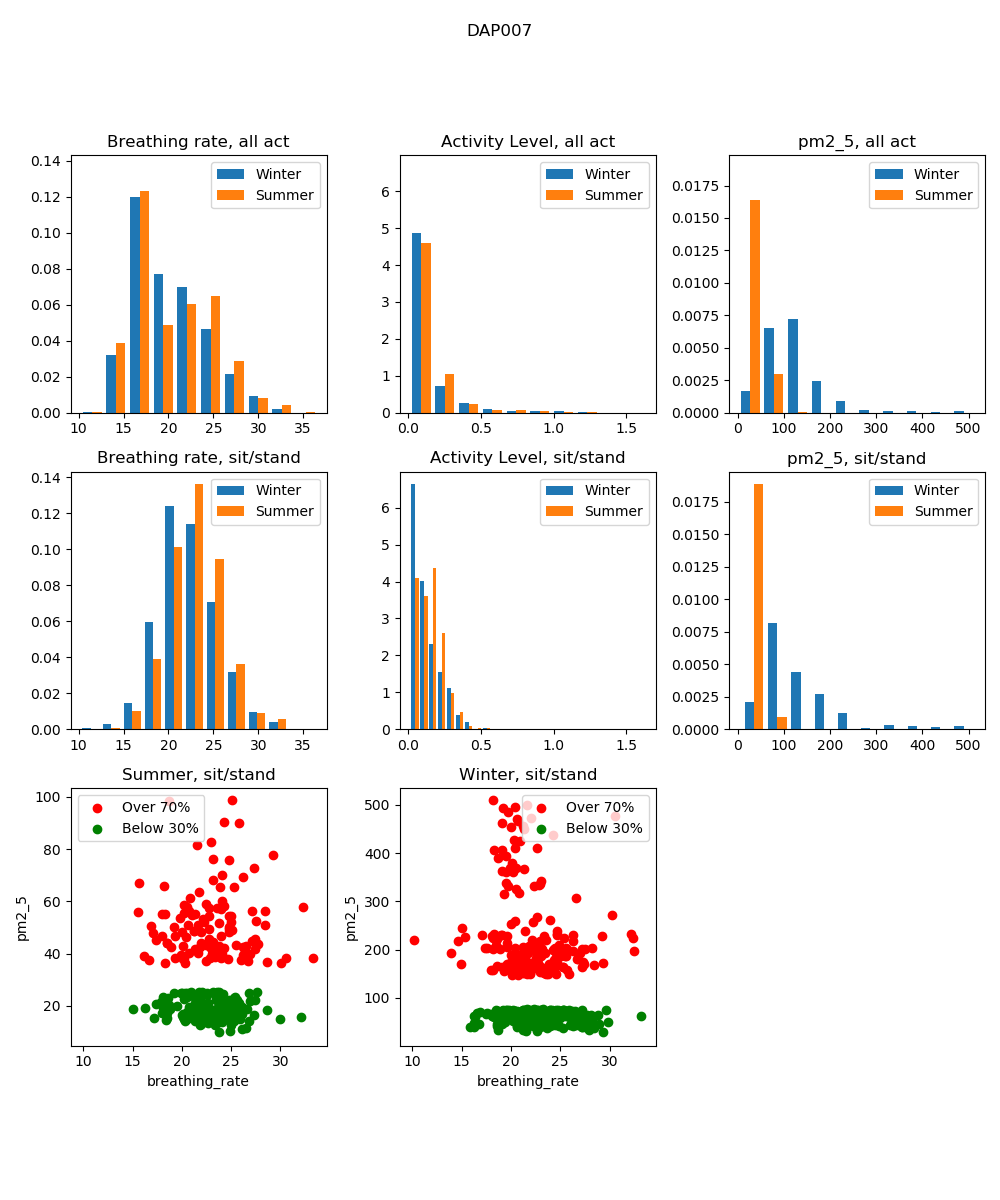

<IPython.core.display.Javascript object>


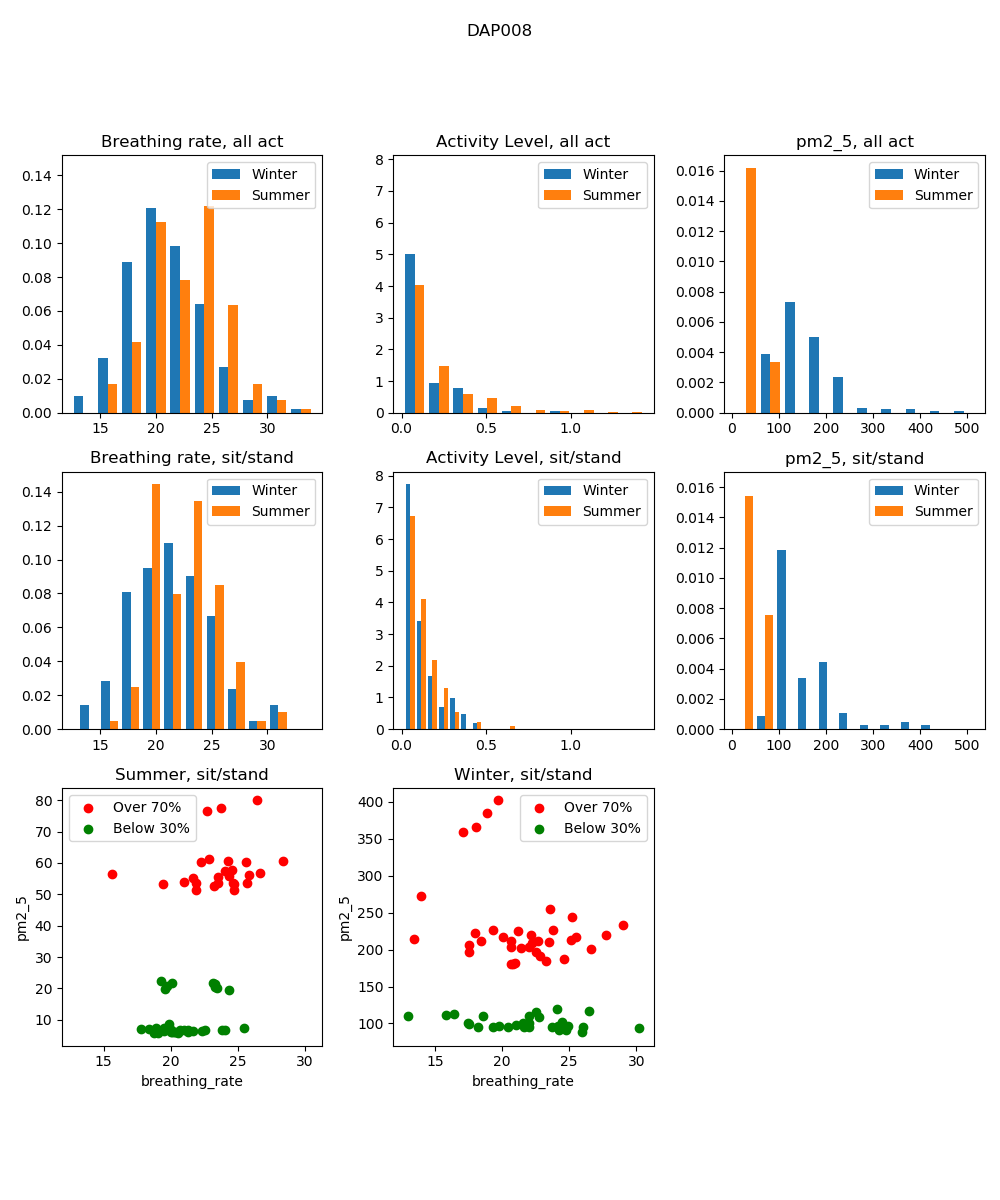

<IPython.core.display.Javascript object>


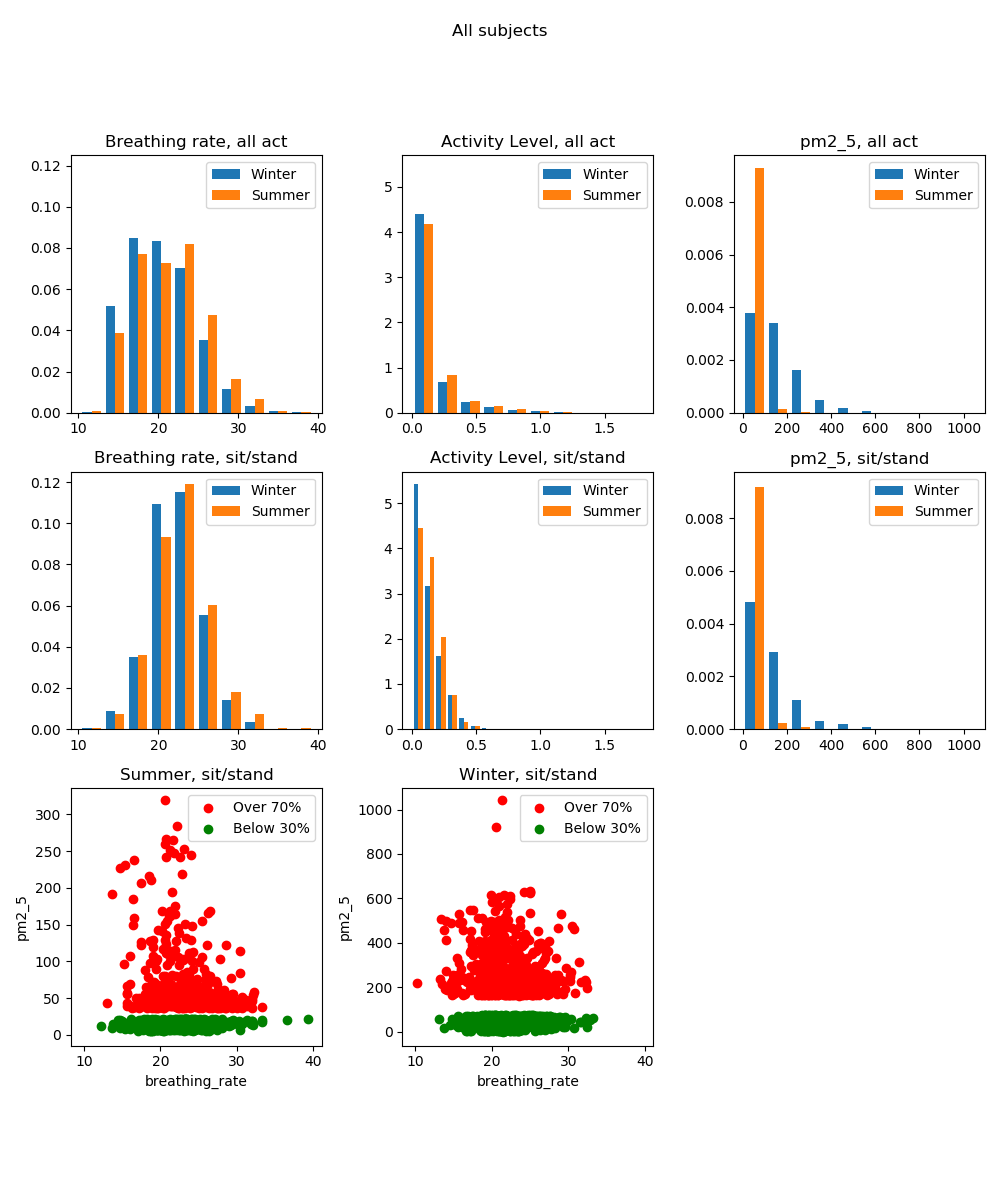

In [79]:
count = 0
n, m = 3, 3
all_summer, all_winter = pd.DataFrame(), pd.DataFrame()
for sub in subject_ids:
    # These subjects' timestamps were outside the range of summer and winter seasons even though they had two recordings
    if sub in ["DAP010", "DAP011", "DAP012", "DAP013", "DAP022"]:
        continue
        
    count += 1
    
    # Reading in the airspeck data
    summer_air_data = pd.read_csv(combined_data_path + sub + "(1)_airspeck_personal.csv")
    summer_air_data["timestamp"] = pd.to_datetime(summer_air_data["timestamp"])
    summer_air_data = summer_air_data[summer_air_data[pm]>0]
    winter_air_data = pd.read_csv(combined_data_path + sub + "(2)_airspeck_personal.csv")
    winter_air_data["timestamp"] = pd.to_datetime(winter_air_data["timestamp"])
    winter_air_data = winter_air_data[winter_air_data[pm]>0]

    # Reading in the RESpeck data
    summer_res_data = pd.read_csv(combined_data_path + sub + "(1)_respeck.csv")
    summer_res_data["timestamp"] = pd.to_datetime(summer_res_data["timestamp"])
    winter_res_data = pd.read_csv(combined_data_path + sub + "(2)_respeck.csv")
    winter_res_data["timestamp"] = pd.to_datetime(winter_res_data["timestamp"])

    # Merging respeck and airspeck data 
    summer_res_data = summer_res_data.merge(summer_air_data, on='timestamp', how='inner')
    winter_res_data = winter_res_data.merge(winter_air_data, on='timestamp', how='inner')
    
    # Disregarding the upper 2% of the data (outliers)
    summer_res_data = summer_res_data[summer_res_data[pm] < np.percentile(summer_res_data[pm],98)].reset_index(drop=True)
    winter_res_data = winter_res_data[winter_res_data[pm] < np.percentile(winter_res_data[pm],98)].reset_index(drop=True)
    
    # Adding all subjects together
    all_summer = all_summer.append(summer_res_data)
    all_winter = all_winter.append(winter_res_data)
    
    # PLOTTING HISTOGRAMS FOR ALL ACTIVITIES
    plt.figure(count, figsize=(10, 4*n))
    plt.suptitle(sub)
    # Breathing rate
    br = plt.subplot(n, m, 1)
    plt.hist([winter_res_data[signame], summer_res_data[signame]], bins=10, label=["Winter", "Summer"], density=True)
    plt.legend()
    plt.title("Breathing rate, all act")
    # Activity level
    al = plt.subplot(n, m, 2)
    plt.hist([winter_res_data["activity_level"], summer_res_data["activity_level"]], bins=10, label=["Winter", "Summer"], density=True)
    plt.legend()
    plt.title("Activity Level, all act")
    # Pm values
    p = plt.subplot(n, m, 3)
    plt.hist([winter_res_data[pm], summer_res_data[pm]], bins=10, label=["Winter", "Summer"], density=True)
    plt.legend()
    plt.title(pm + ", all act")
    
    # Selecting only sitting/standing 
    summer_res_data = summer_res_data[summer_res_data["activity_type"]==0]
    winter_res_data = winter_res_data[winter_res_data["activity_type"]==0]
    
    # PLOTTING HISTOGRAMS ONLY FOR SITTING/STANDING
    # Breathing rate
    plt.subplot(n, m, 4, sharex=br, sharey=br)
    plt.hist([winter_res_data[signame], summer_res_data[signame]], bins=10, label=["Winter", "Summer"], density=True)
    plt.legend()
    plt.title("Breathing rate, sit/stand")
    # Activity level
    plt.subplot(n, m, 5, sharex=al, sharey=al)
    plt.hist([winter_res_data["activity_level"], summer_res_data["activity_level"]], bins=10, label=["Winter", "Summer"], density=True)
    plt.legend()
    plt.title("Activity Level, sit/stand")
    # Pm values
    plt.subplot(n, m, 6, sharex=p, sharey=p)
    plt.hist([winter_res_data[pm], summer_res_data[pm]], bins=10, label=["Winter", "Summer"], density=True)
    plt.legend()
    plt.title(pm + ", sit/stand")
    
    # Summer: bad and good breathing based on percentiles
    res_data_bad = summer_res_data[summer_res_data[pm] > np.percentile(summer_res_data[pm],high_pct)].reset_index(drop=True)
    res_data_good = summer_res_data[summer_res_data[pm] < np.percentile(summer_res_data[pm],low_pct)].reset_index(drop=True)
    
    # Plotting scatter plots of bad and good breathing in summer 
    sc = plt.subplot(n, m, 7)
    plt.scatter(res_data_bad[signame], res_data_bad[pm], c="r", label="Over " + str(high_pct) + "%")
    plt.scatter(res_data_good[signame], res_data_good[pm], c="g", label="Below " + str(low_pct) + "%")
    plt.legend()
    plt.xlabel(signame)
    plt.ylabel(pm)
    plt.title("Summer, sit/stand")
    
    # Winter: bad and good breathing based on percentiles
    res_data_bad = winter_res_data[winter_res_data[pm] > np.percentile(winter_res_data[pm],high_pct)].reset_index(drop=True)
    res_data_good = winter_res_data[winter_res_data[pm] < np.percentile(winter_res_data[pm],low_pct)].reset_index(drop=True)
    
    # Plotting scatter plots of bad and good breathing in winter
    plt.subplot(n, m, 8, sharex=sc)
    plt.scatter(res_data_bad[signame], res_data_bad[pm], c="r", label="Over " + str(high_pct) + "%")
    plt.scatter(res_data_good[signame], res_data_good[pm], c="g", label="Below " + str(low_pct) + "%")
    plt.legend()
    plt.xlabel(signame)
    plt.ylabel(pm)
    plt.title("Winter, sit/stand")
    
    plt.tight_layout(rect=[0, 0.08, 1, 0.9])
    
#     plt.savefig(r".\Analysis\Daphne\Seasons\\" + sub + "_high" + str(high_pct) + "_low" + str(low_pct) + ".png")

# ALL SUBJECTS
count += 1
plt.figure(count, figsize=(10, 4*n))
plt.suptitle("All subjects")
# Breathing rate
br = plt.subplot(n, m, 1)
plt.hist([all_winter[signame], all_summer[signame]], bins=10, label=["Winter", "Summer"], density=True)
plt.legend()
plt.title("Breathing rate, all act")
# Activity level
al = plt.subplot(n, m, 2)
plt.hist([all_winter["activity_level"], all_summer["activity_level"]], bins=10, label=["Winter", "Summer"], density=True)
plt.legend()
plt.title("Activity Level, all act")
# Pm values
p = plt.subplot(n, m, 3)
plt.hist([all_winter[pm], all_summer[pm]], bins=10, label=["Winter", "Summer"], density=True)
plt.legend()
plt.title(pm + ", all act")

# Selecting only sitting/standing 
all_summer = all_summer[all_summer["activity_type"]==0]
all_winter = all_winter[all_winter["activity_type"]==0]

# Breathing rate
plt.subplot(n, m, 4, sharex=br, sharey=br)
plt.hist([all_winter[signame], all_summer[signame]], bins=10, label=["Winter", "Summer"], density=True)
plt.legend()
plt.title("Breathing rate, sit/stand")
# Activity level
plt.subplot(n, m, 5, sharex=al, sharey=al)
plt.hist([all_winter["activity_level"], all_summer["activity_level"]], bins=10, label=["Winter", "Summer"], density=True)
plt.legend()
plt.title("Activity Level, sit/stand")
# Pm values
plt.subplot(n, m, 6, sharex=p, sharey=p)
plt.hist([all_winter[pm], all_summer[pm]], bins=10, label=["Winter", "Summer"], density=True)
plt.legend()
plt.title(pm + ", sit/stand")

# Summer: bad and good breathing based on percentiles
res_data_bad = all_summer[all_summer[pm] > np.percentile(all_summer[pm],high_pct)].reset_index(drop=True)
res_data_good = all_summer[all_summer[pm] < np.percentile(all_summer[pm],low_pct)].reset_index(drop=True)

# Plotting scatter plots of bad and good breathing in summer
sc = plt.subplot(n, m, 7)
plt.scatter(res_data_bad[signame], res_data_bad[pm], c="r", label="Over " + str(high_pct) + "%")
plt.scatter(res_data_good[signame], res_data_good[pm], c="g", label="Below " + str(low_pct) + "%")
plt.legend()
plt.xlabel(signame)
plt.ylabel(pm)
plt.title("Summer, sit/stand")

# Winter bad and good breathing based on percentiles
res_data_bad = all_winter[all_winter[pm] > np.percentile(all_winter[pm],high_pct)].reset_index(drop=True)
res_data_good = all_winter[all_winter[pm] < np.percentile(all_winter[pm],low_pct)].reset_index(drop=True)

# Plotting scatter plots of bad and good breathing in winter
plt.subplot(n, m, 8, sharex=sc)
plt.scatter(res_data_bad[signame], res_data_bad[pm], c="r", label="Over " + str(high_pct) + "%")
plt.scatter(res_data_good[signame], res_data_good[pm], c="g", label="Below " + str(low_pct) + "%")
plt.legend()
plt.xlabel(signame)
plt.ylabel(pm)
plt.title("Winter, sit/stand")

plt.tight_layout(rect=[0, 0.08, 1, 0.9])
# plt.savefig(r".\Analysis\Daphne\Seasons\\Allsubjects_high" + str(high_pct) + "_low" + str(low_pct) + ".png")